# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
- capomulin, ramicane: certified bangers of drugs
- male to female ratio on point (weak)
- find more things pls
 

In [1]:
# Dependencies and Setup
import numpy as np
import random as rand
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
raw_mouse_df = pd.merge(mouse_metadata, study_results, how='outer', on=['Mouse ID', 'Mouse ID'])

# Display the data table for preview
display(raw_mouse_df.shape)
display(raw_mouse_df.info())
display(raw_mouse_df.head())

(1893, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


None

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
raw_mouse_df['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
raw_mouse_df.loc[raw_mouse_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False), :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df = raw_mouse_df.loc[(raw_mouse_df['Mouse ID'] != 'g989'), :]
mouse_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Drug Regimen        1880 non-null   object 
 2   Sex                 1880 non-null   object 
 3   Age_months          1880 non-null   int64  
 4   Weight (g)          1880 non-null   int64  
 5   Timepoint           1880 non-null   int64  
 6   Tumor Volume (mm3)  1880 non-null   float64
 7   Metastatic Sites    1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


In [5]:
# Optional: clean up column names for easier use in code.
mouse_df.columns = ['mouse_id', 'drug_regimen', 'sex', 'age_months', 'weight', 'timepoint', 'tumor_volume', 'metastatic_sites']
mouse_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mouse_id          1880 non-null   object 
 1   drug_regimen      1880 non-null   object 
 2   sex               1880 non-null   object 
 3   age_months        1880 non-null   int64  
 4   weight            1880 non-null   int64  
 5   timepoint         1880 non-null   int64  
 6   tumor_volume      1880 non-null   float64
 7   metastatic_sites  1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_df.mouse_id.nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
reg_sum = mouse_df.groupby('drug_regimen').tumor_volume.agg(['mean',
                                                             'median',
                                                             'var',
                                                             'std',
                                                             'sem'])
reg_sum

,mean,median,var,std,sem
drug_regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: title={'center': '# of Data Entries Per Drug Regimen'}, xlabel='Drug Regimen', ylabel='# of Entries'>

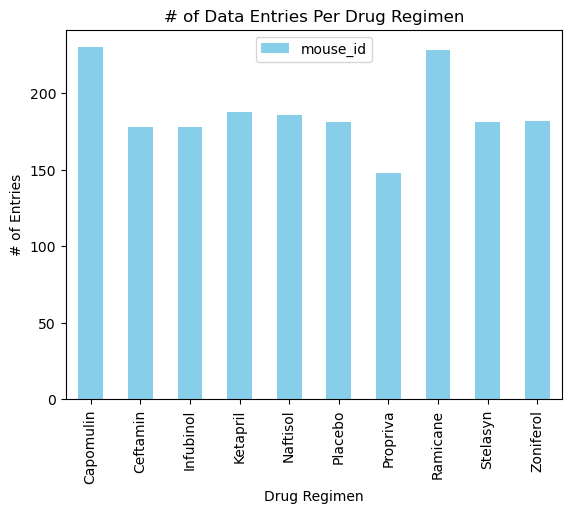

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# First: we generate a new DataFrame containing the counts of mouse_id grouped into the drug_regimen as the index.
bar_sum = mouse_df[['mouse_id', 'drug_regimen']].set_index('drug_regimen').groupby('drug_regimen').count()

# Now: we plot it. Minor formatting to make it a little palatable.
bar_sum.plot(kind = 'bar',
             xlabel = 'Drug Regimen',
             ylabel = '# of Entries',
             title = '# of Data Entries Per Drug Regimen',
             color = 'skyblue')

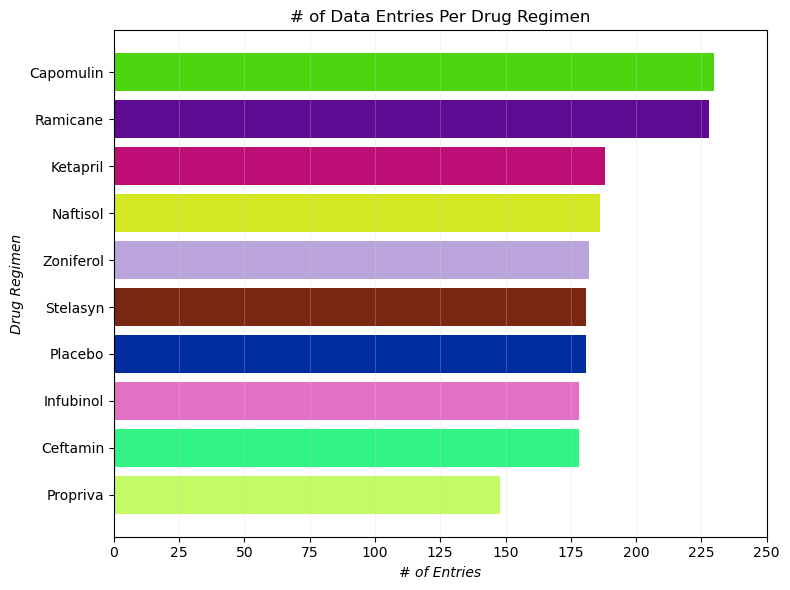

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Step 1: data.
x_axis = mouse_df.groupby('drug_regimen').mouse_id.count().sort_values().index
y_axis = mouse_df.groupby('drug_regimen').mouse_id.count().sort_values()

# Step 2: prepare canvas.
plt.figure(figsize=(8, 6))

# Step 3: skeleton plot.
plt.barh(x_axis, y_axis, color = ["#%06x" % rand.randint(0, 0xFFFFFF) for x in x_axis])

# Step 4: formatting.
plt.xlabel('# of Entries', fontstyle = 'italic', fontsize = 10)
plt.xlim(0, 250)
plt.xticks(np.arange(0, 260, 25))

plt.ylabel('Drug Regimen', fontstyle = 'italic', fontsize = 10)

plt.title('# of Data Entries Per Drug Regimen')

plt.grid(axis = 'x', color = 'lightgray', alpha = .25)

# Step 5: save/show.
plt.tight_layout()
plt.savefig('drug_regimen_entries.png')
plt.show()

<Axes: title={'center': 'Sex of Mice in Study'}>

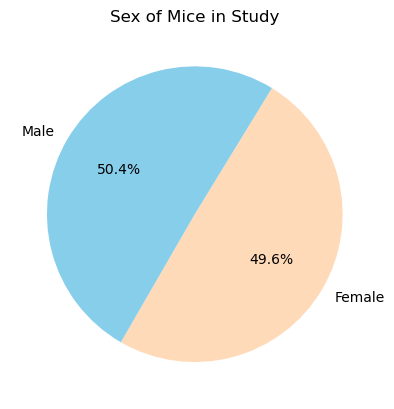

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# First: create a DataFrame to plot.
pie_sum = mouse_df.groupby('sex')['mouse_id'].nunique()

# Now: plot it. With minor formatting.
pie_sum.plot(kind = 'pie',
             title = 'Sex of Mice in Study',
             ylabel = '',
             colors = ['peachpuff', 'skyblue'],
             startangle = 240,
             autopct = '%1.1f%%')

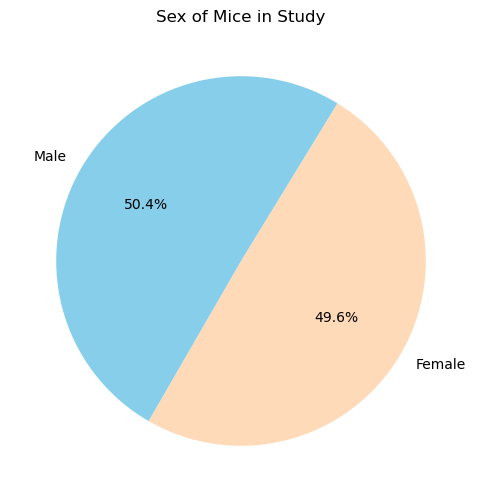

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Step 1: data.
data = mouse_df.groupby('sex').mouse_id.nunique()

# Step 2: create canvas.
plt.figure(figsize=(8, 6))

# Step 3: skeleton plot.
plt.pie(data,
        colors = ['peachpuff', 'skyblue'],
        startangle = 240,
        autopct = '%1.1f%%',
        labels = ['Female', 'Male'])

# Step 4: formatting.
plt.title('Sex of Mice in Study')

# Step 5: save/show.
plt.savefig('pie_chart.png')
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse.
# Group by 'mouse_id' and call 'max()' on 'timepoint' to get the final timepoints.
group_df = mouse_df.groupby("mouse_id").timepoint.max()

# Make the group into a new DataFrame.
temp_df = group_df.reset_index()

# Merge this DataFrame with the original using 'inner' to get a new DataFrame containing the final timepoints for each mouse.
merged_df = pd.merge(mouse_df, temp_df, on=["mouse_id", "timepoint"], how="inner")
merged_df = merged_df.rename(columns={"timepoint": "final_timepoint"})

# Show a snippet.
display(merged_df.shape)
display(merged_df.info())
display(merged_df.head(10))
display(merged_df.groupby('drug_regimen').tumor_volume.describe())

(248, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mouse_id          248 non-null    object 
 1   drug_regimen      248 non-null    object 
 2   sex               248 non-null    object 
 3   age_months        248 non-null    int64  
 4   weight            248 non-null    int64  
 5   final_timepoint   248 non-null    int64  
 6   tumor_volume      248 non-null    float64
 7   metastatic_sites  248 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 15.6+ KB


None

,mouse_id,drug_regimen,sex,age_months,weight,final_timepoint,tumor_volume,metastatic_sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
5,s508,Ramicane,Male,1,17,45,30.276232,0
6,f966,Capomulin,Male,16,17,20,30.485985,0
7,m546,Ramicane,Male,18,16,45,30.564625,1
8,z578,Ramicane,Male,11,16,45,30.638696,0
9,j913,Ramicane,Female,4,17,45,31.560470,1


,count,mean,std,min,25%,50%,75%,max
drug_regimen,,,,,,,,
Capomulin,25.0,36.667568,5.715188,23.343598,32.377357,38.125164,40.159220,47.685963
Ceftamin,25.0,57.753977,8.365568,45.000000,48.722078,59.851956,64.299830,68.923185
Infubinol,25.0,58.178246,8.602957,36.321346,54.048608,60.165180,65.525743,72.226731
Ketapril,25.0,62.806191,9.945920,45.000000,56.720095,64.487812,69.872251,78.567014
Naftisol,25.0,61.205757,10.297083,45.000000,52.079510,63.283288,69.563621,76.668817
Placebo,25.0,60.508414,8.874672,45.000000,52.942902,62.030594,68.134288,73.212939
Propriva,24.0,56.493884,8.415626,45.000000,49.119739,55.591622,62.689368,72.455421
Ramicane,25.0,36.191390,5.671539,22.050126,31.560470,36.561652,40.659006,45.220869
Stelasyn,24.0,61.001707,9.504293,45.000000,52.476596,62.192350,69.103944,75.123690


In [13]:
# Put treatments into a list for a for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    # IQR is ... Q3 - Q1 (quantile .75 and quantile .25).
    q3 = merged_df.loc[merged_df.drug_regimen == drug, 'tumor_volume'].quantile(.75)
    q1 = merged_df.loc[merged_df.drug_regimen == drug, 'tumor_volume'].quantile(.25)
    iqr = q3 - q1

    # Print out IQR.
    print(f'IQR for {drug}: {iqr}')

    # Outliers for each drug regimen.
    if len(merged_df.loc[(merged_df.drug_regimen == drug) & 
                     ((merged_df.tumor_volume > (q3 + 1.5 * iqr)) | (merged_df.tumor_volume < (q1 - 1.5 * iqr))), :]) > 0:
        print(f'Outliers for {drug}: ')
        display(merged_df.loc[(merged_df.drug_regimen == drug) & 
                          ((merged_df.tumor_volume > (q3 + 1.5 * iqr)) | (merged_df.tumor_volume < (q1 - 1.5 * iqr))), :])
    else:
        print(f'No outliers for {drug}.\n')
    
    # Add the mice to our list for plotting (later).
    tumor_vol.append(merged_df.loc[merged_df.drug_regimen == drug, 'tumor_volume'])

IQR for Capomulin: 7.781863460000004
No outliers for Capomulin.

IQR for Ramicane: 9.098536719999998
No outliers for Ramicane.

IQR for Infubinol: 11.477135160000003
Outliers for Infubinol: 


,mouse_id,drug_regimen,sex,age_months,weight,final_timepoint,tumor_volume,metastatic_sites
74,c326,Infubinol,Female,18,25,5,36.321346,0


IQR for Ceftamin: 15.577752179999997
No outliers for Ceftamin.



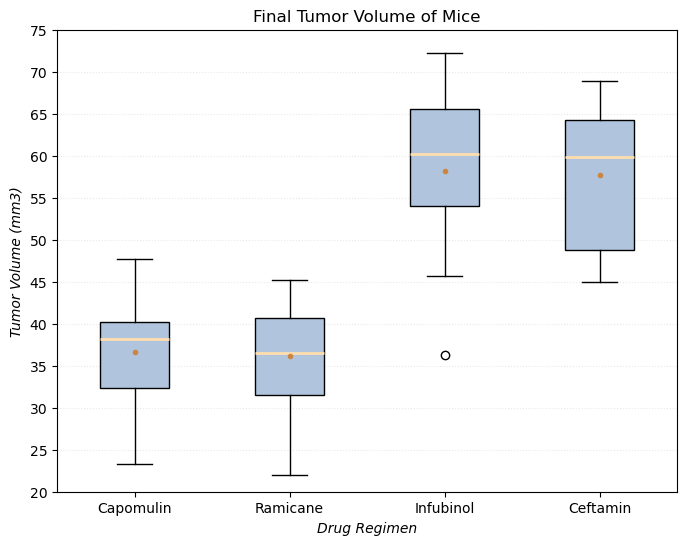

In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Step 1: data.
# Did this earlier...

# Step 2: create canvas.
plt.figure(figsize=(8, 6))

# Step 3: skeleton plot.
plt.boxplot(tumor_vol,
            labels = drugs,
            showmeans = True,
            patch_artist = True,
            boxprops = dict(facecolor = 'lightsteelblue'),
            meanprops = dict(markerfacecolor = 'peru', markeredgecolor = 'peru', marker = '.'),
            medianprops = dict(color = 'navajowhite', linewidth = 2))

# Step 4: formatting.
plt.title('Final Tumor Volume of Mice', fontsize = 12)

plt.xlabel('Drug Regimen', fontsize = 10, fontstyle = 'italic')
plt.xlim(.5, 4.5)

plt.ylabel('Tumor Volume (mm3)', fontsize = 10, fontstyle = 'italic')
plt.yticks(np.arange(20, 80, 5))
plt.ylim(20, 75)

plt.grid(color = 'lightgray', linestyle = 'dotted', axis = 'y', alpha = .5)

# Step 5: save/show.
plt.show()

## Line and Scatter Plots

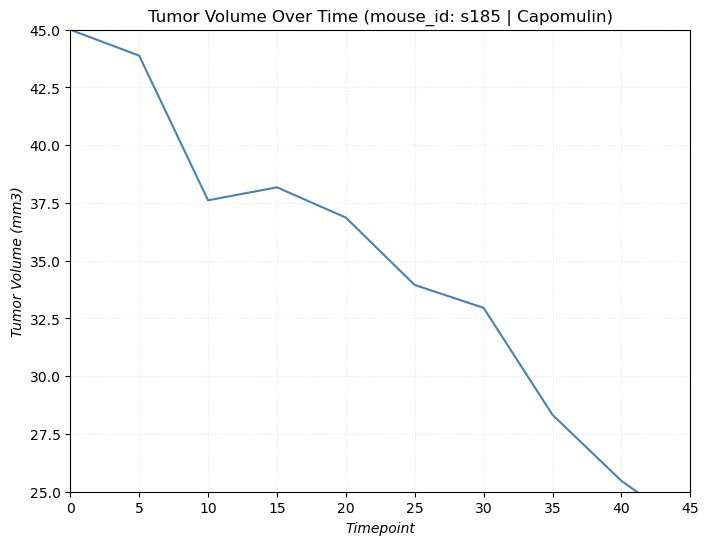

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Step 1: data.
m_id = 's185'
d_reg = 'Capomulin'

y = mouse_df.loc[(mouse_df.mouse_id == m_id) & (mouse_df.drug_regimen == d_reg), :].tumor_volume
x = mouse_df.loc[(mouse_df.mouse_id == m_id) & (mouse_df.drug_regimen == d_reg), :].timepoint

# Step 2: create canvas.
plt.figure(figsize=(8, 6))

# Step 3: skeleton plot.
plt.plot(x,
         y,
         color = 'steelblue')

# Step 4: formatting.
plt.title('Tumor Volume Over Time (mouse_id: ' + m_id + ' | ' + d_reg + ')', fontsize = 12)

plt.xlabel('Timepoint', fontsize = 10, fontstyle = 'italic')
plt.xticks(np.arange(0, 50, 5))
plt.xlim(0, 45)

plt.ylabel('Tumor Volume (mm3)', fontsize = 10, fontstyle = 'italic')
plt.yticks(np.arange(25, 50, 2.5))
plt.ylim(25, 45)

plt.grid(color = 'lightgray', linestyle = 'dotted', alpha = .5)

# Step 5: show/save.
plt.show()

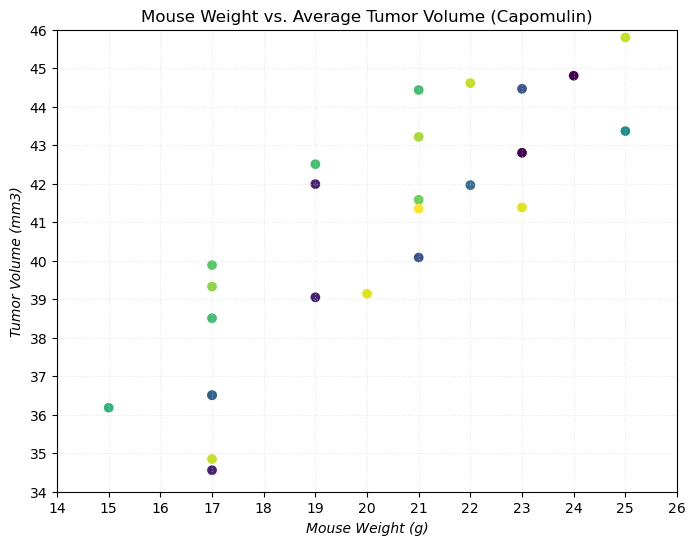

In [16]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Step 1: data.
d_reg = 'Capomulin'

x = mouse_df.loc[mouse_df.drug_regimen == d_reg, :].groupby('mouse_id').weight.mean()
y = mouse_df.loc[mouse_df.drug_regimen == d_reg, :].groupby('mouse_id').tumor_volume.mean()
c = mouse_df.loc[mouse_df.drug_regimen == d_reg, :].groupby('mouse_id').age_months.mean()

# Step 2: create canvas.
plt.figure(figsize=(8, 6))

# Step 3: skeleton plot.
plt.scatter(x = x,
            y = y,
            c = c,
            cmap = 'viridis')

# Step 4: formatting.
plt.title('Mouse Weight vs. Average Tumor Volume (' + d_reg + ')', fontsize = 12)

plt.xlabel('Mouse Weight (g)', fontsize = 10, fontstyle = 'italic')
plt.xticks(np.arange(14, 28, 1))
plt.xlim(14, 26)

plt.ylabel('Tumor Volume (mm3)', fontsize = 10, fontstyle = 'italic')
plt.yticks(np.arange(34, 48, 1))
plt.ylim(34, 46)

plt.grid(color = 'lightgray', linestyle = 'dotted', alpha = .5)

# Step 5: show/save.
plt.show()

## Correlation and Regression

Linear regression for weight vs. tumor volume for Capomulin is: y = 0.95x + 21.55
Correlation between weight and tumor volume for Capomulin is: 0.8419363424694722


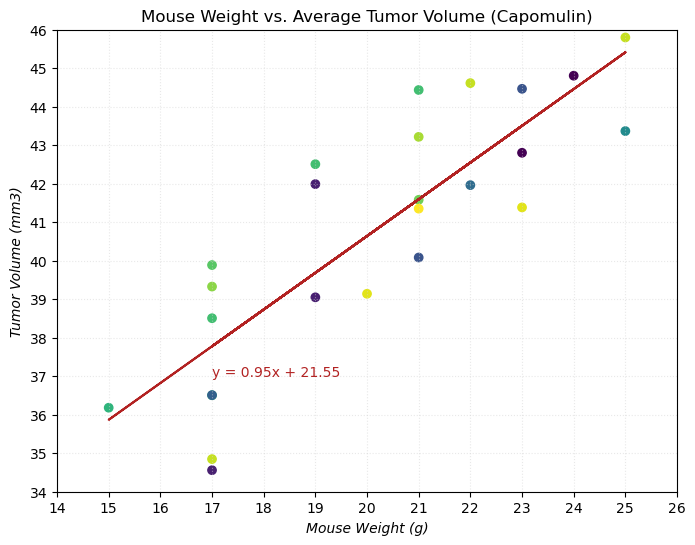

In [17]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Step 1: data.
d_reg = 'Capomulin'

x = mouse_df.loc[mouse_df.drug_regimen == d_reg, :].groupby('mouse_id').weight.mean()
y = mouse_df.loc[mouse_df.drug_regimen == d_reg, :].groupby('mouse_id').tumor_volume.mean()
c = mouse_df.loc[mouse_df.drug_regimen == d_reg, :].groupby('mouse_id').age_months.mean()

# Regression.
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f'Linear regression for weight vs. tumor volume for {d_reg} is: {line_eq}')

# Correlation.
corr = x.corr(y)

print(f'Correlation between weight and tumor volume for {d_reg} is: {corr}')

# Step 2: create canvas.
plt.figure(figsize=(8, 6))

# Step 3: skeleton plot.
plt.scatter(x = x,
            y = y,
            c = c,
            cmap = 'viridis')
plt.plot(x, regress_values, color = 'firebrick')
plt.text(17, 37, line_eq, color = 'firebrick')

# Step 4: formatting.
plt.title('Mouse Weight vs. Average Tumor Volume (' + d_reg + ')', fontsize = 12)

plt.xlabel('Mouse Weight (g)', fontsize = 10, fontstyle = 'italic')
plt.xticks(np.arange(14, 28, 1))
plt.xlim(14, 26)

plt.ylabel('Tumor Volume (mm3)', fontsize = 10, fontstyle = 'italic')
plt.yticks(np.arange(34, 48, 1))
plt.ylim(34, 46)

plt.grid(color = 'lightgray', linestyle = 'dotted', alpha = .5)

# Step 5: show/save.
plt.show()

Linear regression for weight vs. tumor volume for Ramicane is: y = 0.77x + 25.16
Correlation between weight and tumor volume for Ramicane is: 0.8060300656584948


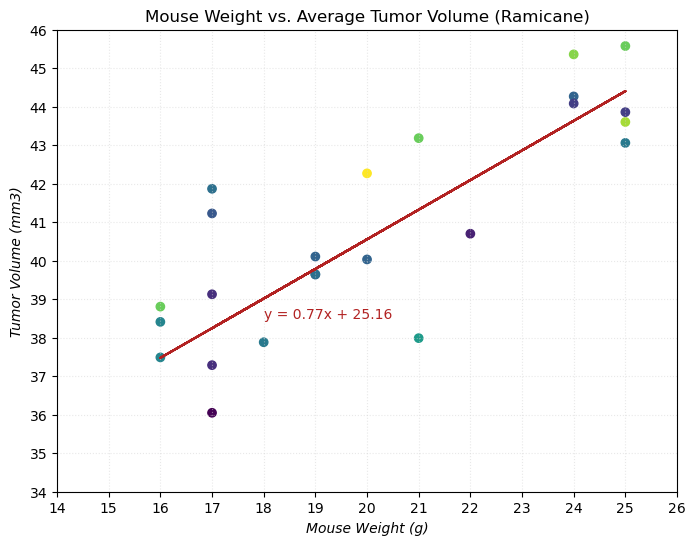

In [18]:
# Ramicane...
# Step 1: data.
d_reg = 'Ramicane'

x = mouse_df.loc[mouse_df.drug_regimen == d_reg, :].groupby('mouse_id').weight.mean()
y = mouse_df.loc[mouse_df.drug_regimen == d_reg, :].groupby('mouse_id').tumor_volume.mean()
c = mouse_df.loc[mouse_df.drug_regimen == d_reg, :].groupby('mouse_id').age_months.mean()

# Regression.
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f'Linear regression for weight vs. tumor volume for {d_reg} is: {line_eq}')

# Correlation.
corr = x.corr(y)

print(f'Correlation between weight and tumor volume for {d_reg} is: {corr}')

# Step 2: create canvas.
plt.figure(figsize=(8, 6))

# Step 3: skeleton plot.
plt.scatter(x = x,
            y = y,
            c = c,
            cmap = 'viridis')
plt.plot(x, regress_values, color = 'firebrick')
plt.text(18, 38.5, line_eq, color = 'firebrick')

# Step 4: formatting.
plt.title('Mouse Weight vs. Average Tumor Volume (' + d_reg + ')', fontsize = 12)

plt.xlabel('Mouse Weight (g)', fontsize = 10, fontstyle = 'italic')
plt.xticks(np.arange(14, 28, 1))
plt.xlim(14, 26)

plt.ylabel('Tumor Volume (mm3)', fontsize = 10, fontstyle = 'italic')
plt.yticks(np.arange(34, 48, 1))
plt.ylim(34, 46)

plt.grid(color = 'lightgray', linestyle = 'dotted', alpha = .5)

# Step 5: show/save.
plt.show()